In [1]:
import xarray as xr
import salem
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
path="/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_complete/26_xxxxxx_xxxxx_puertoayora_l2_complete.csv"

ds = pd.read_csv(path, parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-06-30']
ds.head()

def glob_measurements(ds_number = "??"):
    path="/home/ben/data/darwin_measured/"
    files = glob(f"/home/ben/data/darwin_measured/{ds_number}_AWS*/*[!xlsx_complete]")
    files = [file for file in files if not file.count("xlsx") and not file.count("_-_")]
    
def load_measurements(path):
    ds = pd.read_csv(path, parse_dates=['datetime'], index_col=['datetime'])
    ds.name = path.split("/")[-1].split("_")[-3]
    return ds.loc['2022-04-01':'2022-06-30']


def plot_pcp(data, title = None, sample_rate="D", **kwargs):
    timeseries = {}
    variables = ['PCP_diff_radar', 'PCP_diffmin_radar', 'PCP_acoustic']
    fig, ax = plt.subplots()
    for var in data.columns:
        if var in variables:
            timeseries[var] = data[var].resample(sample_rate).sum()
            timeseries[var].cumsum().plot(ax=ax)
    if var in variables:
        plt.legend()
        if title:
            plt.title(title)
        plt.xlabel("")
        # plt.savefig(f'pcp_{title}.png')

In [51]:
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

In [67]:
files = glob("/home/ben/data/darwin_measured/??_AWS*/*[!xlsx_complete]")
files = [file for file in files if not file.count("xlsx") and not file.count("_-_")]

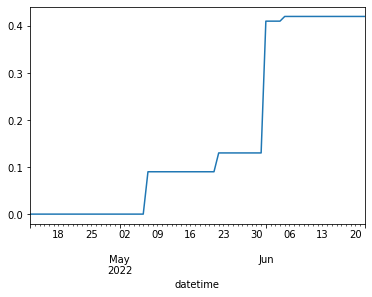

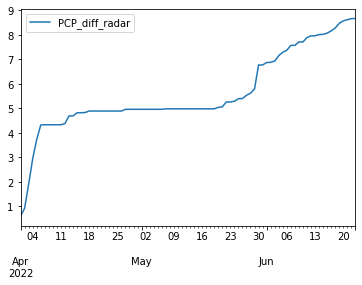

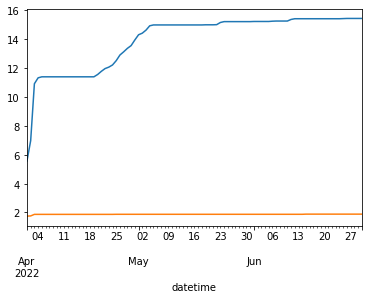

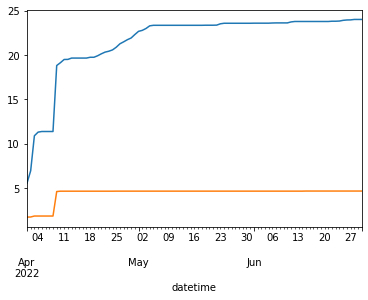

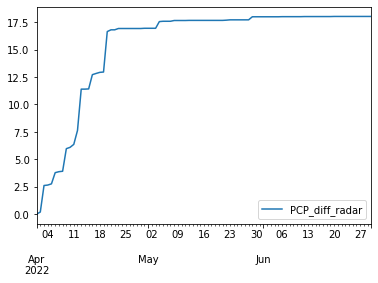

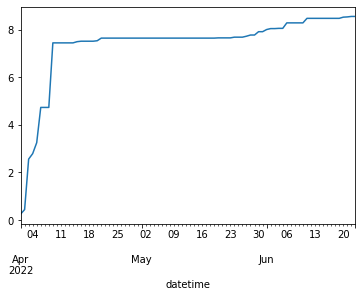

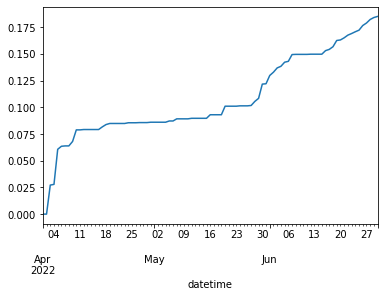

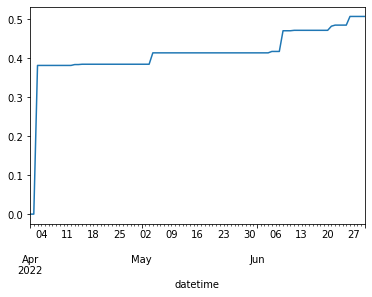

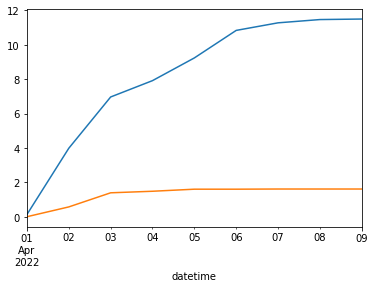

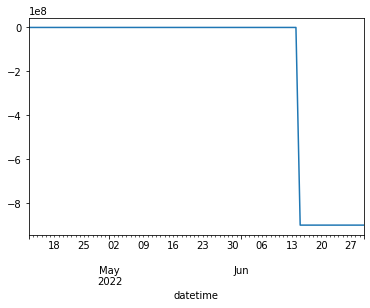

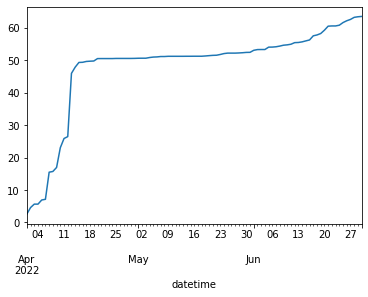

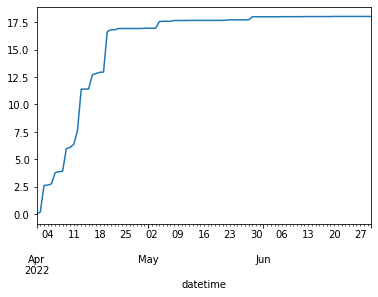

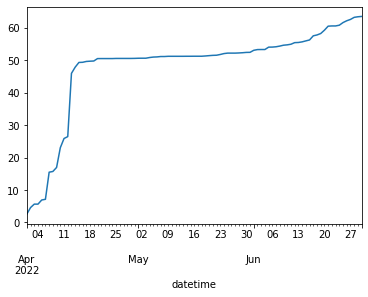

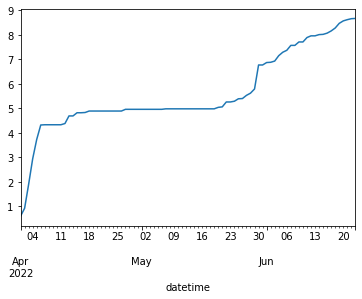

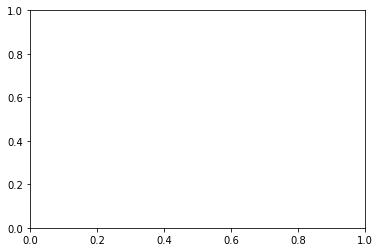

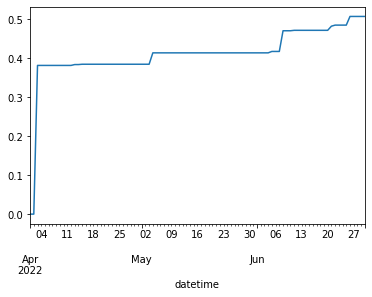

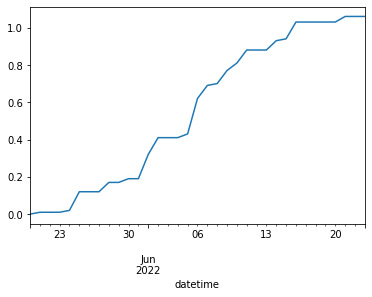

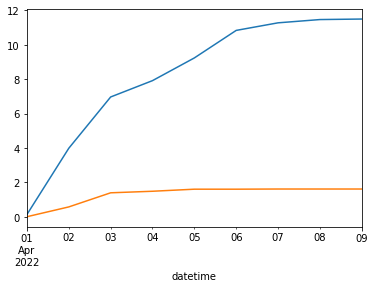

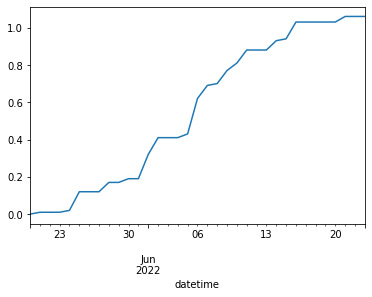

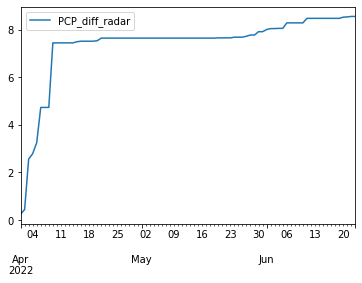

In [82]:
for path in files:
    ds = load_measurements(path)
    plot_pcp(ds)

In [12]:
ds = pd.read_csv(path, parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-06-30']
ds.head()
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

,T,RH,SLR,WS,WSmax,PCP_diff_radar,Pabs,WD,PCP_acoustic,FOG
datetime,,,,,,,,,,
2022-04-01 00:00:00,NaN,NaN,0.0,0.78,3.9,0.00,943.0,343.3,0.0,-0.3
2022-04-01 00:10:00,NaN,NaN,0.0,0.95,3.5,0.01,943.0,180.0,0.0,-0.8
2022-04-01 00:20:00,NaN,NaN,0.0,1.04,3.8,0.00,943.0,12.3,0.0,-1.3
2022-04-01 00:30:00,NaN,NaN,0.0,1.01,3.3,0.00,943.0,357.4,0.0,-1.7
2022-04-01 00:40:00,NaN,NaN,0.0,1.18,4.3,0.00,942.0,345.2,0.0,0.0
